**1. Analog filters:
• Consider a RC circuit with input voltage Vi = 10V applied to the
series RC and output Vo taken from the ends of C with R = 47kΩ
and C = 47nF. Find the transfer function of the circuit and plot
the frequency and magnitude spectrum. Which kind of filter is this?
Prove your claim by putting in the frequency as 100Hz and 10000Hz
and finding the values of Vo. Find the cutoff frequency and verify that
the behaviour is justified.** 

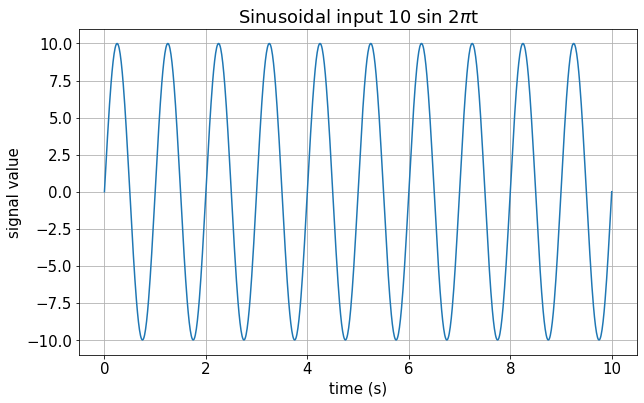

In [76]:
import numpy as np
import matplotlib.pyplot as plt

start=0
end=10
t=np.linspace(start,end,(end-start)*100)
Vi=10*np.sin(2*np.pi*t)

plt.figure(figsize=(10,6))
plt.plot(t,Vi)
plt.xlabel('time (s)')
plt.ylabel('signal value')
plt.title(f'Sinusoidal input 10 sin 2$\pi$t')
plt.grid()
plt.show()

In [77]:
from sympy import *
a,b,c,d=symbols('pi f R C')
expr=1/sympy.sqrt(1 + 2*a*b*c*d*I)**2
print(' The transfer function is: ')
expr

 The transfer function is: 


1/(2*I*C*R*f*pi + 1)

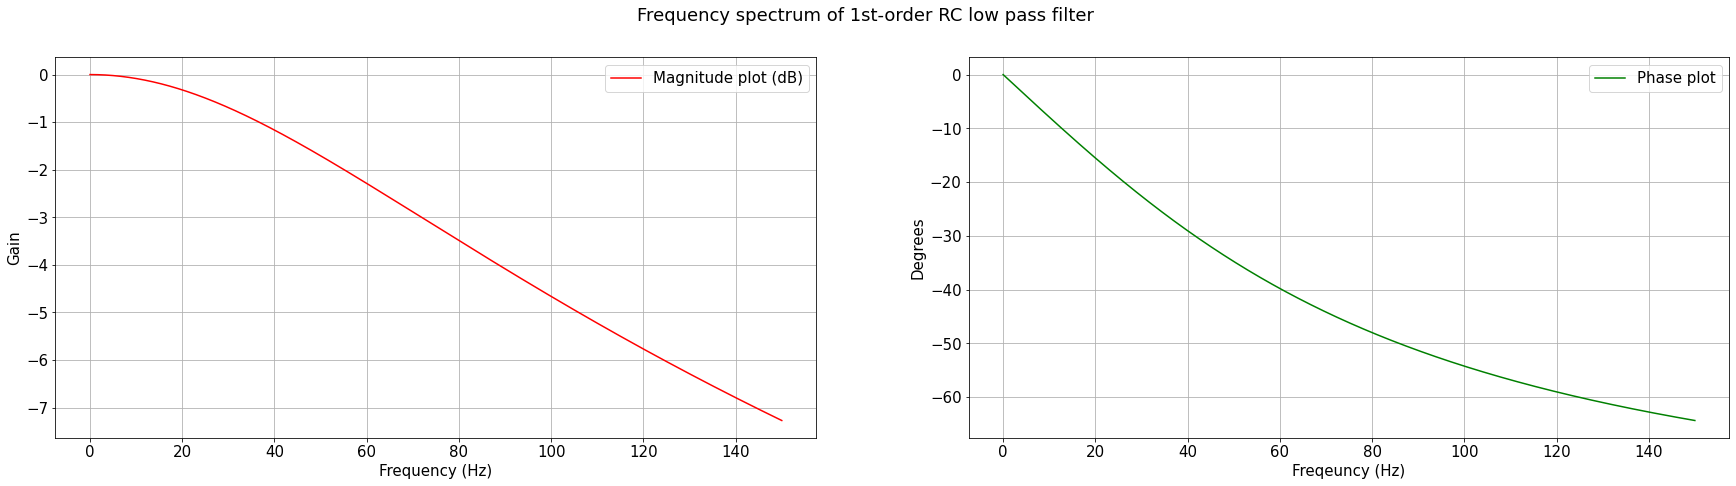

In [135]:
import cmath

R=47000
C=47e-9
freq=150
f=np.linspace(0,freq,freq*100)
tf=[1/complex(1,2*np.pi*i*R*C) for i in list(f)]
tf=np.array(tf)

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
#plt.figure(figsize=(10,10))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(f,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].legend()
ax[0].grid()
ax[1].plot(f,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Freqeuncy (Hz)')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 1st-order RC low pass filter')
plt.show()

**This is a low pass filter**

In [79]:
f1=100
f2=10000

Vi_rms=10/np.sqrt(2)
Vo_rms = 1/np.sqrt(1+(2*np.pi*f1*R*C)**2) * Vi_rms
print(f'RMS value of output voltage when f=100 Hz : {Vo_rms} V' )

Vo_rms = 1/np.sqrt(1+(2*np.pi*f2*R*C)**2) * Vi_rms
print(f'RMS value of output voltage when f=10000 Hz : {Vo_rms} V' )

RMS value of output voltage when f=100 Hz : 4.133487337032317 V
RMS value of output voltage when f=10000 Hz : 0.05094459877065783 V


This shows that it passes low-frequency signals with a much higher gain since both the input signals had same input RMS voltage.

In [136]:
fc=0
eps=0.0001
pbg = abs(tf[0]) # pass band gain
fcg = pbg/sqrt(2)
for i in range(len(tf)):
  if abs(tf[i])<fcg+eps and abs(tf[i])>fcg-eps:
    fc=f[i]
print(f'Cut-off frequency = {fc} Hz')

Cut-off frequency = 72.06480432028802 Hz


At cut-off frequency, the gain magnitude is 1/sqrt(2) times the pass-band gain. After that it falls off sharply. So this justifies why the output voltage is very low at 10000 Hz but relatively higher at 100 Hz. 

**Consider the same circuit mentioned before, but now the output voltage is taken across the resistor. Does this change the behaviour of
the transfer function? Find the transfer function of the circuit and
plot the frequency and magnitude spectrum. Which kind of filter is
this? Prove your claim by putting in the frequency as 100Hz and
10000Hz and finding the values of Vo. Find the cutoff frequency and
verify that the behaviour is justified.**

In [38]:
from sympy import *
a,b,c,d=symbols('pi f R C')
expr=sympy.sqrt(I*2*a*b*c*d)**2/sympy.sqrt(1 + 2*a*b*c*d*I)**2
print(' The transfer function is: ')
expr

 The transfer function is: 


2*I*C*R*f*pi/(2*I*C*R*f*pi + 1)

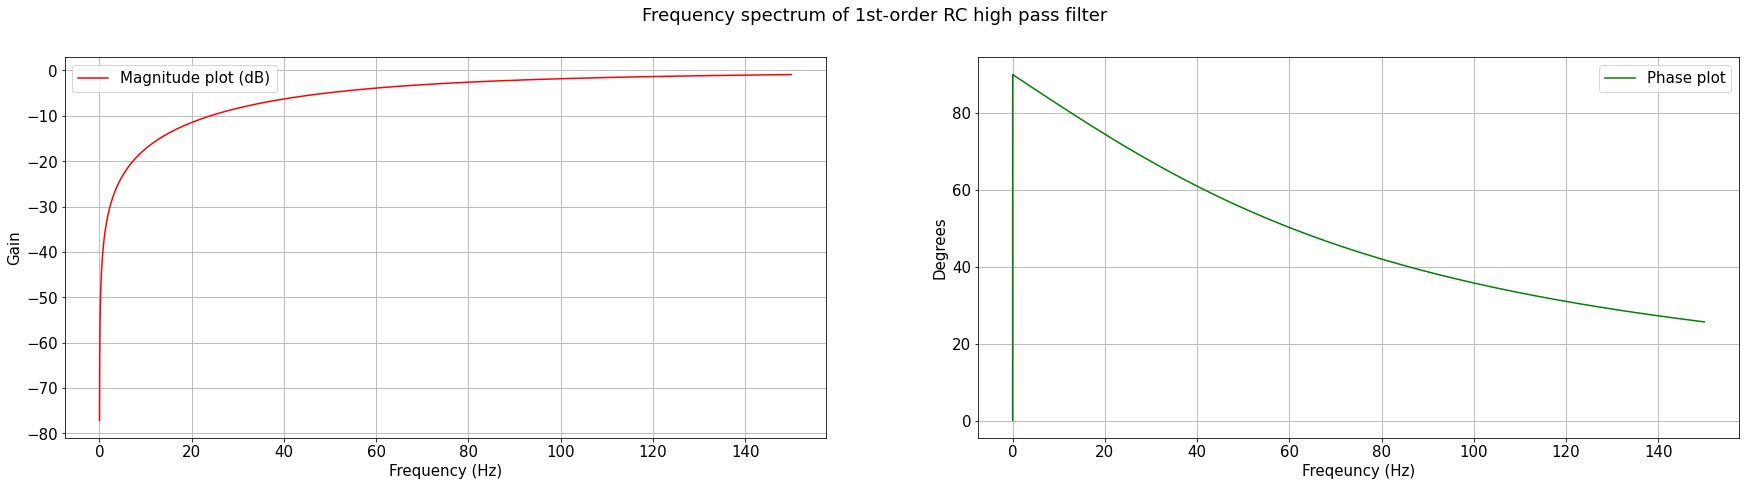

In [39]:
import cmath

R=47000
C=47e-9
freq=150
f=np.linspace(0,freq,freq*100)
tf=[complex(0,2*np.pi*i*R*C)/complex(1,2*np.pi*i*R*C) for i in list(f)]
tf=np.array(tf)

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
#plt.figure(figsize=(10,10))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(f,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].legend()
ax[0].grid()
ax[1].plot(f,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Freqeuncy (Hz)')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 1st-order RC high pass filter')
plt.show()

**This is high pass filter**

In [40]:
f1=100
f2=10000

Vi_rms=10/np.sqrt(2)
Vo_rms = (2*np.pi*f1*R*C)/np.sqrt(1+(2*np.pi*f1*R*C)**2) * Vi_rms
print(f'RMS value of output voltage when f=100 Hz : {Vo_rms} V' )

Vo_rms = (2*np.pi*f2*R*C)/np.sqrt(1+(2*np.pi*f2*R*C)**2) * Vi_rms
print(f'RMS value of output voltage when f=10000 Hz : {Vo_rms} V' )

RMS value of output voltage when f=100 Hz : 5.737097038973061 V
RMS value of output voltage when f=10000 Hz : 7.070884290373877 V


In [139]:

fc=0
eps=0.0001
pbg = np.max(abs(tf)) # pass band gain
fcg = pbg/sqrt(2)
for i in range(len(tf)):
  if abs(tf[i])<fcg+eps and abs(tf[i])>fcg-eps:
    fc=f[i]
    

print(f'Cut-off frequency = {fc} Hz')

Cut-off frequency = 72.8979813544 Hz


At cut-off frequency, the gain magnitude is 1/sqrt(2) times the pass-band gain. The gain monotonously increases with frequency as seen from the plot. So this justifies why the output voltage is high at 10000 Hz but relatively lower at 100 Hz. 

**• Design a second order low pass filter using RC circuit. Do the analysis for R = 50KΩ and C = 50nF. The input voltage waveform is
10 sin 2πt. Plot the amplitude and frequency spectrum.**

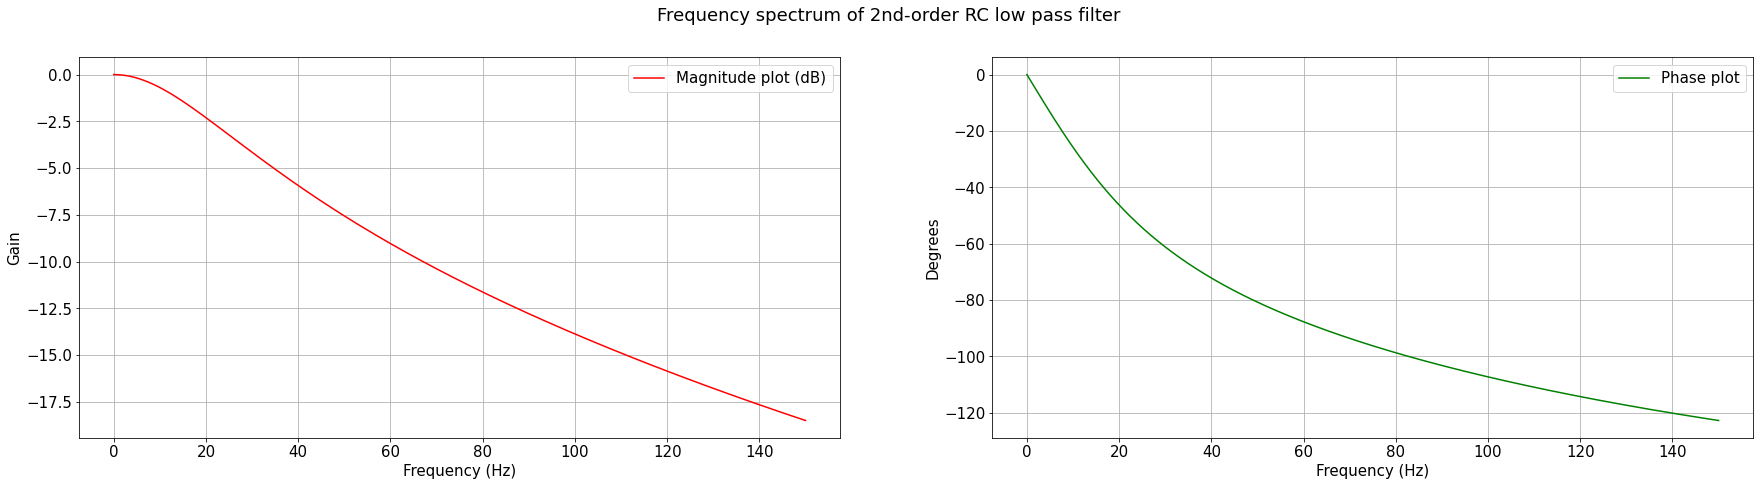

In [43]:
R=50000
C=50e-9

a= R**2 * C**2
b=3*R*C
freq=150

f=np.linspace(0,freq,freq*100)
w=2*np.pi*f
tf=[1/complex(1-(i**2 * a),b * i) for i in list(w)]
tf=np.array(tf)

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
#plt.figure(figsize=(10,10))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(f,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].legend()
ax[0].grid()
ax[1].plot(f,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 2nd-order RC low pass filter')
plt.show()

In [44]:
from sympy import *
a,b,c,d=symbols('pi f R C')
expr=1/sympy.sqrt(1 - 4*a**2*b**2*c**2*d**2 + 6*a*b*c*d*I)**2
print(' The transfer function is: ')
expr

 The transfer function is: 


1/(-4*C**2*R**2*f**2*pi**2 + 6*I*C*R*f*pi + 1)

In [138]:
fc=0
eps=0.0001
pbg = np.max(abs(tf)) # pass band gain
fcg = pbg/sqrt(2)
for i in range(len(tf)):
  if abs(tf[i])<fcg+eps and abs(tf[i])>fcg-eps:
    #print(fc)
    fc=f[i]
print(f'Cut-off frequency = {fc} Hz')

Cut-off frequency = 41.14945388491 Hz


**This is a second-order low-pass filter.**

**Design a band pass filter using cascaded RC circuits. Make use of the values of the 2 resistors as 20KΩ. The filter should pass all the
frequencies between 1kHz and 30kHz. Find the transfer function of
the same and plot the magnitude and amplitude of the filter.**

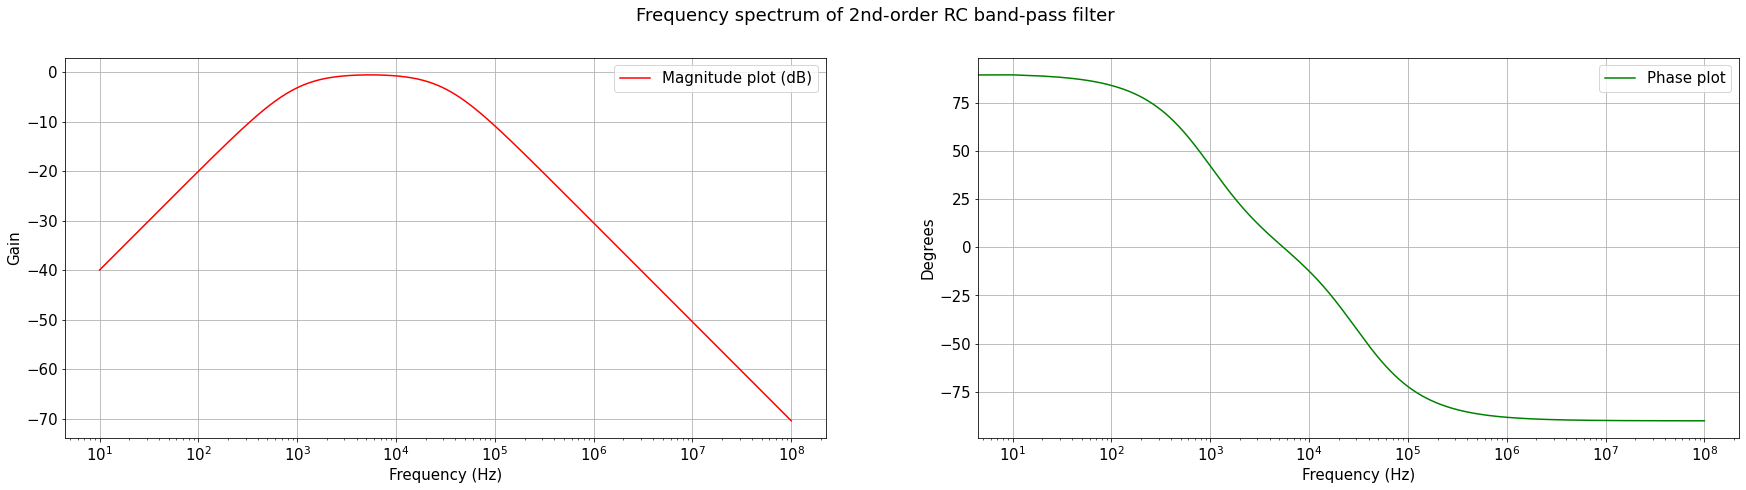

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

R=20000
fh=30000
fl=1000

import warnings
warnings.filterwarnings('ignore')

C1=1/(2*np.pi*fl*R)
C2=1/(2*np.pi*fh*R)


a= R**2 * C1*C2
b=R*(C1 + 2*C2)
freq=int(1e+8)

f=np.linspace(0,freq,int(freq/10))
w=2*np.pi*f
tf=[complex(0,i*R*C1)/complex(1-(i**2 * a),b * i) for i in list(w)]
tf=np.array(tf)

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
#plt.figure(figsize=(10,10))
#plt.xscale('log')
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(f,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].grid()
ax[1].plot(f,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 2nd-order RC band-pass filter')
plt.show()

In [13]:
import sympy
from sympy import *
a,b,c,d,e=symbols('pi f R C_1 C_2')
expr=sympy.sqrt(I*2*a*b*c*d)**2/sympy.sqrt(1 - 4*a**2*b**2*c**2*d*e + 2*a*b*c*I*(d+2*e))**2
print(' The transfer function is: ')
expr

 The transfer function is: 


2*I*C_1*R*f*pi/(-4*C_1*C_2*R**2*f**2*pi**2 + 2*I*R*f*pi*(C_1 + 2*C_2) + 1)

**2. Digital filters
• Consider the difference equation:
y[n] = x[n] + x[n − 1]
Find the output of the system to the sequence: x[n] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
What kind of filter is this? Compute the transfer function to plot the frequency and amplitude plots to verify your claim. Consider the
sinusoidal input to the filter with unit amplitude. Take the sampling
rate to be 1 Hz. Find and plot the filter output.**

In [14]:
def yn(x):
  x=[0]+list(x)
  y=[]
  for i in range(1,len(x)):
    y.append(x[i]+x[i-1])
  return np.array(y)

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print('Filter input: ')
print(x)
print('Filter output: ')
print(yn(x))

[ 1  3  5  7  9 11 13 15 17 19]


In [32]:
import sympy
from sympy import *
a=symbols('z')
expr=sympy.sqrt((a+1)/a)**2
print('The transfer function : ')
expr

The transfer function : 


(z + 1)/z

**This is a low pass filter**

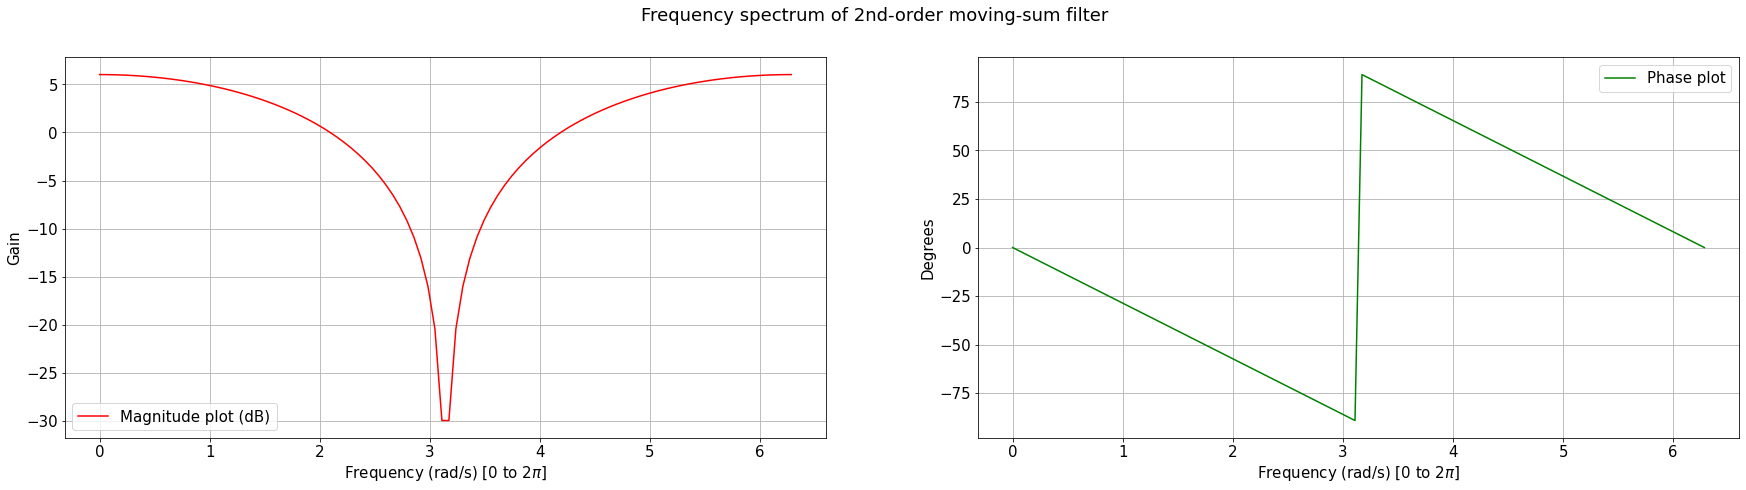

In [48]:
#freq=200
#f=np.linspace(0,freq,freq)
w=np.linspace(0,2*np.pi,100)
z=np.array([exp(complex(0,i)) for i in w ], dtype=complex)

tf=1+z**(-1)

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(w,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (rad/s) [0 to 2$\pi$]')
ax[0].legend()
ax[0].grid()
ax[1].plot(w,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (rad/s) [0 to 2$\pi$]')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 2nd-order moving-sum filter')
plt.show()

**The plots confirm that it is a low-pass filter**

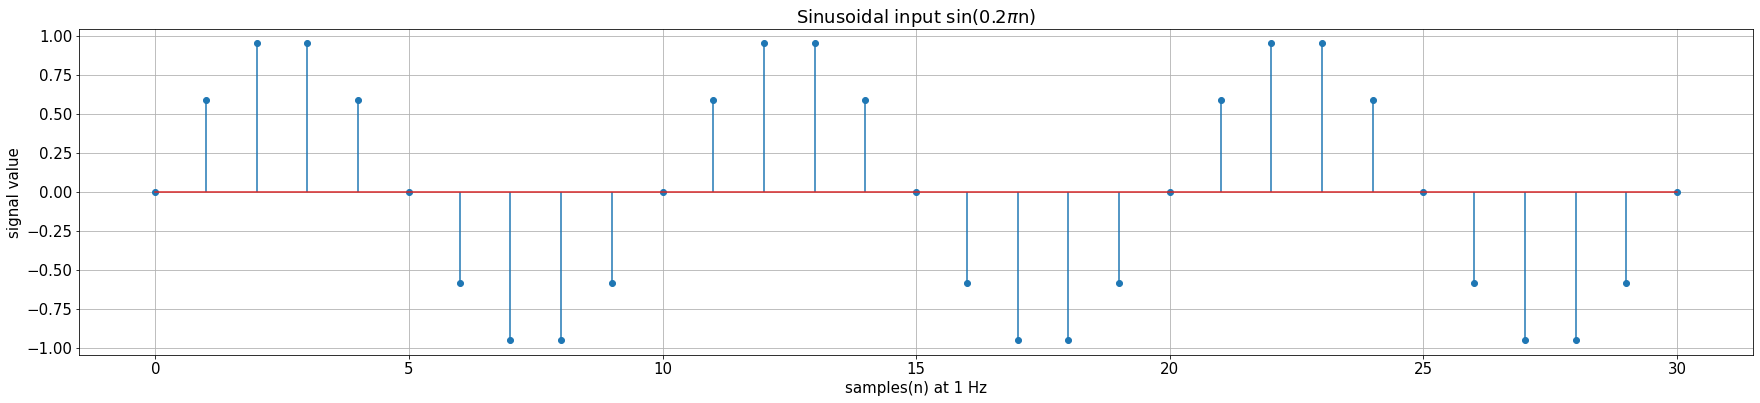

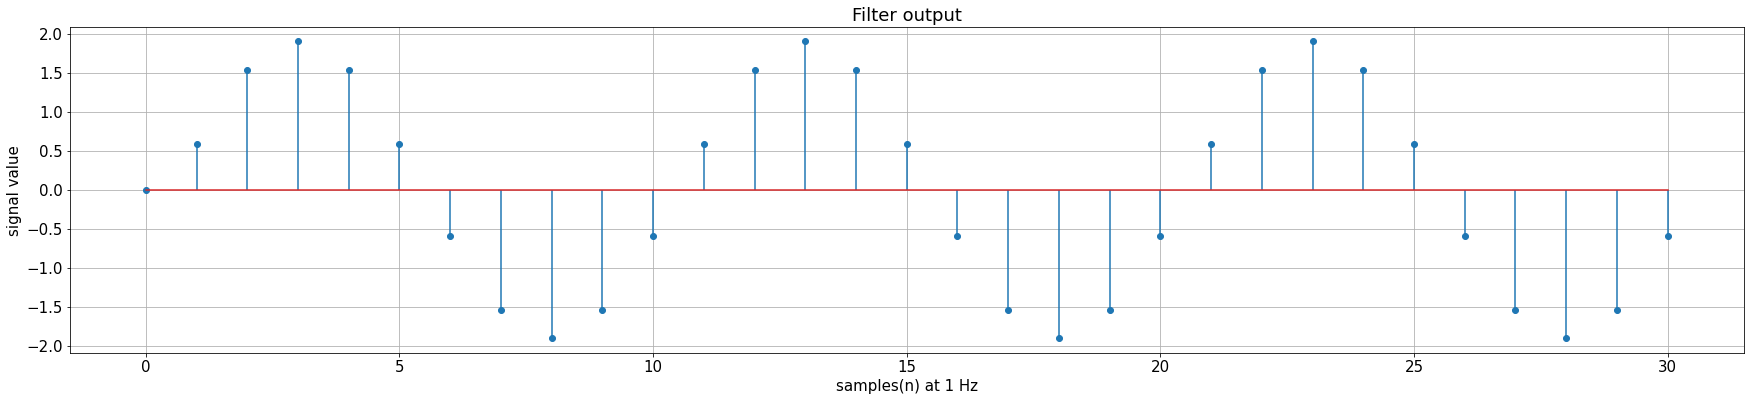

In [35]:
rnge=30
n=np.arange(0,rnge+1)
ip=np.sin(0.2*np.pi*n)

plt.figure(figsize=(30,6))
plt.stem(n,ip,use_line_collection=True)
plt.xlabel('samples(n) at 1 Hz')
plt.ylabel('signal value')
plt.title(f'Sinusoidal input sin(0.2$\pi$n)')
plt.grid()
plt.show()

op=yn(ip)
plt.figure(figsize=(30,6))
plt.stem(n,op,use_line_collection=True)
plt.xlabel('samples(n) at 1 Hz')
plt.ylabel('signal value')
plt.title(f'Filter output')
plt.grid()
plt.show()


**• Consider the difference equation:
y[n] = 1/3
(x[n] + x[n − 1] + x[n − 2])
What is this filter called? Compute the transfer function to plot the
frequency and amplitude spectrum. What are the applications of this
filter?**

In [46]:
def yn(x):
  x=[0]*2+list(x)
  y=[]
  for i in range(1,len(x)):
    y.append((x[i]+x[i-1]+x[i-2])/3)
  return np.array(y)

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print('Filter input: ')
print(x)
print('Filter output: ')
print(yn(x))

Filter input: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Filter output: 
[3.33333333 0.33333333 1.         2.         3.         4.
 5.         6.         7.         8.         9.        ]


**It is a 3-point moving average filter.**

The filter perform three important functions:
1) It takes 3 input points, computes the average of those 3-points and produces a single output
point

2) Due to the computation/calculations involved , the filter introduces a definite amount of delay

3) The filter acts as a Low Pass Filter

In [52]:
from sympy import *
a=symbols('z')
expr=sympy.sqrt((1 + a**-1 + a**-2)/3)**2
print('The transfer function : ')
expr

The transfer function : 


1/3 + 1/(3*z) + 1/(3*z**2)

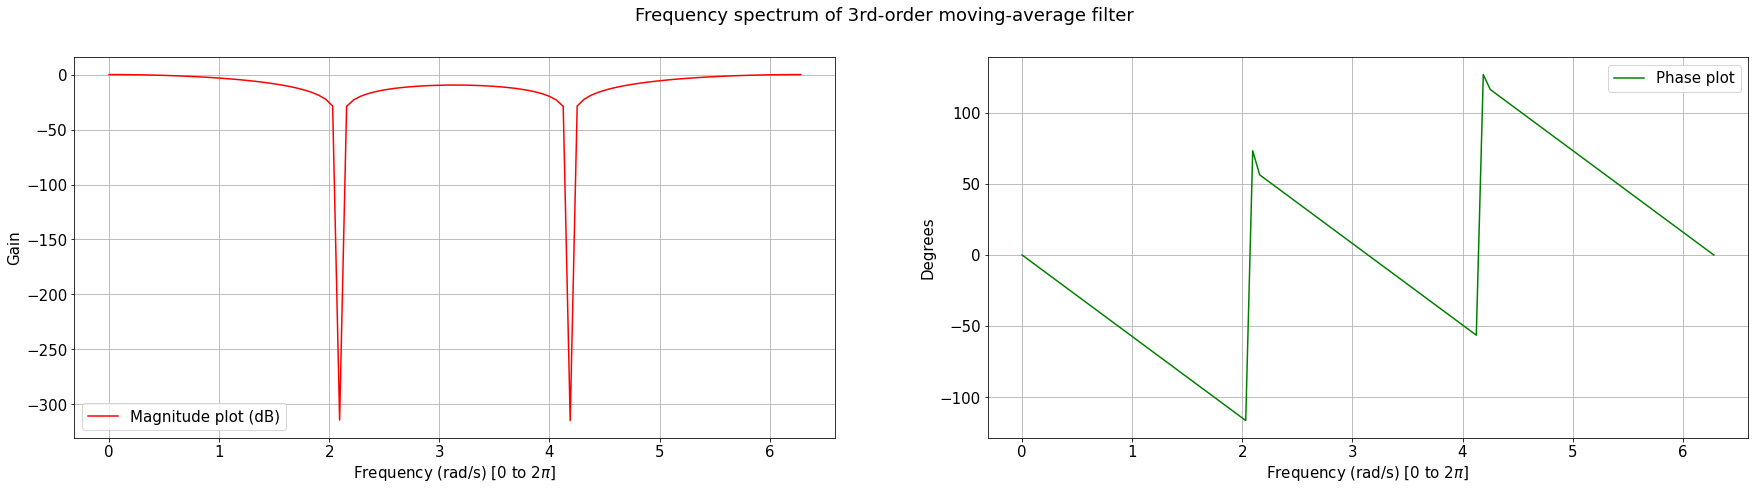

In [53]:
w=np.linspace(0,2*np.pi,100)
z=np.array([exp(complex(0,i)) for i in w ], dtype=complex)

tf=(1+z**(-1)+z**(-2))/3

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(w,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (rad/s) [0 to 2$\pi$]')
ax[0].legend()
ax[0].grid()
ax[1].plot(w,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (rad/s) [0 to 2$\pi$]')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 3rd-order moving-average filter')
plt.show()

**Improve the above filter by the differential equation:
y[n] = 1
4
x[n] + 1
2
x[n − 1] + 1
4
x[n − 2]
and again do the whole analysis.**

In [54]:
def yn(x):
  x=[0]*2+list(x)
  y=[]
  for i in range(1,len(x)):
    y.append((x[i]+2*x[i-1]+x[i-2])/4)
  return np.array(y)

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print('Filter input: ')
print(x)
print('Filter output: ')
print(yn(x))

Filter input: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Filter output: 
[2.5  0.25 1.   2.   3.   4.   5.   6.   7.   8.   9.  ]


In [55]:
from sympy import *
a=symbols('z')
expr=sympy.sqrt((1 + 2*a**-1 + a**-2)/4)**2
print('The transfer function : ')
expr

The transfer function : 


1/4 + 1/(2*z) + 1/(4*z**2)

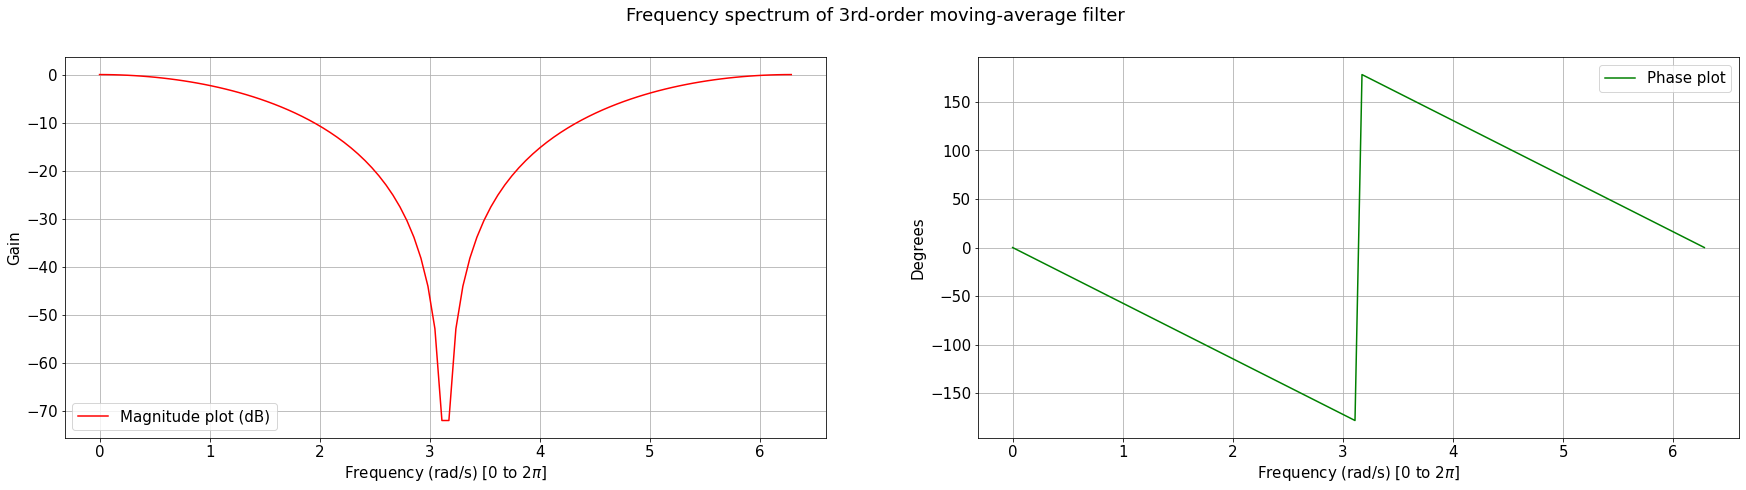

In [57]:
w=np.linspace(0,2*np.pi,100)
z=np.array([exp(complex(0,i)) for i in w ], dtype=complex)

tf=(1+(2*z**(-1))+z**(-2))/4

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(w,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (rad/s) [0 to 2$\pi$]')
ax[0].legend()
ax[0].grid()
ax[1].plot(w,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (rad/s) [0 to 2$\pi$]')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 3rd-order moving-average filter')
plt.show()

This has one zero at $\pi$ rad/s. Here the numerator of the transfer function forms a perfect square, so it has both the zeros at $\pi$ rad/s. While the other filter (giving equal weightage of 1/3 to all the last 3 samples) had 2 zeroes. 

**• Take any digital image of your choice and apply mean and median
filtering. What are the differences between the two? Take an image
and add speckle noise to it. Use a particular filter to remove this
noise. Take another image and add salt and pepper noise and again
use a particular filter to remove the noise. Plot the original images,
noisy images and images after noise removal respectively.**

Original image:


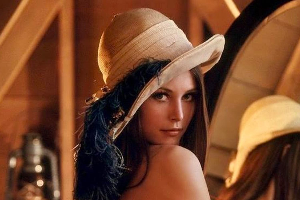


After applying 5x5 mean filter:


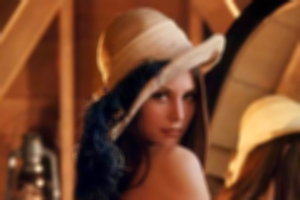


After applying 5x5 median filter:


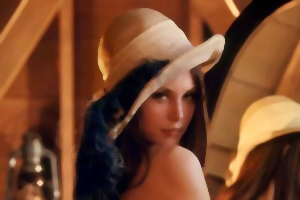

In [16]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img=cv2.imread('/content/drive/MyDrive/IIT_Guwahati/IITG_DigitalSignalProcessorsLab/lena.jpg') 
#cv2_imshow(img)
img = cv2.resize(img, (300, 200)) 
print('Original image:')
cv2_imshow(img)

print()
kernel = np.ones((5,5),np.float32)/25
mean_filt = cv2.filter2D(img,-1,kernel)
print('After applying 5x5 mean filter:')
cv2_imshow(mean_filt)

print()
median_filt = cv2.medianBlur(img,5)
print('After applying 5x5 median filter:')
cv2_imshow(median_filt)


The median filtered image looks less blurred. 

After adding speckle noise


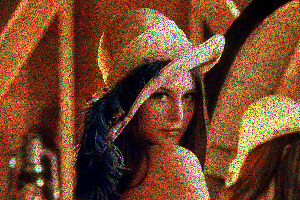


After applying 3x3 mean filter:


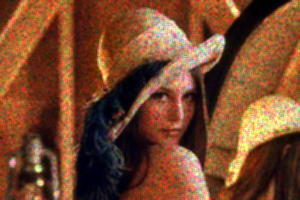


After applying 5x5 mean filter:


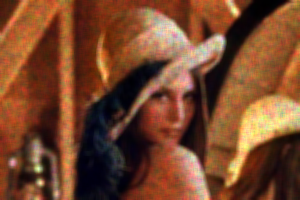

In [30]:
def add_speckle(image):
  row,col,ch = image.shape
  sigma=0.4
  gauss = np.random.normal(0,sigma,(row,col,ch))
  gauss = gauss.reshape(row,col,ch)        
  noisy = image + image * gauss
  return noisy

speckled=add_speckle(img)
print('After adding speckle noise')
cv2_imshow(speckled)

print()
kernel = np.ones((3,3),np.float32)/9
mean_filt = cv2.filter2D(speckled,-1,kernel)
print('After applying 3x3 mean filter:')
cv2_imshow(mean_filt)


print()
kernel = np.ones((5,5),np.float32)/25
mean_filt = cv2.filter2D(speckled,-1,kernel)
print('After applying 5x5 mean filter:')
cv2_imshow(mean_filt)


After adding salt and pepper noise


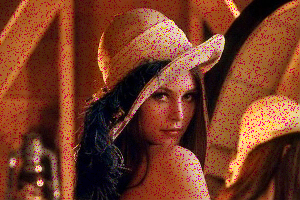


After applying 5x5 median filter:


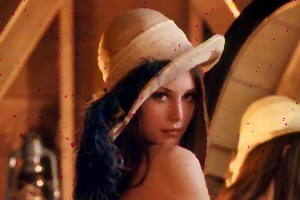

In [28]:
def add_saltpep(image):
  row,col,ch = image.shape
  s_vs_p = 0.5
  amount = 0.1
  out = np.copy(image)
  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  out[tuple(coords)] = 1
  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  out[tuple(coords)] = 0
  return out

sp=add_saltpep(img)
print('After adding salt and pepper noise')
cv2_imshow(sp)

print()
med_filt = cv2.medianBlur(sp,3)
print('After applying 3x3 median filter:')
cv2_imshow(med_filt)


**• Can we convert an analog filter into a digital filter altogether? What
is the way to do it? Use the technique to convert all the analog filters
into digital filters and plot the amplitude and frequency plots.**

The bilinear transformation is a change of variables (a mapping) that is linear in both the numerator and denominator. The usual form is 

                      s = (2/T).((z-1)/(z+1))

We are taking sampling interval T=1 second 



**Analog to Digital conversion of 1st order low pass filter**

In [96]:
from sympy import *
s,r,c=symbols('s R C')
expr=1/(1 + s*r*c)
print(' The transfer function is: ')
expr

 The transfer function is: 


1/(C*R*s + 1)

In [97]:
z=symbols('z')
T=1
expr=expr.subs(s,  2*((z-1)/(z+1)) )
print('Substituting s ')
expr

Substituting s 


1/(2*C*R*(z - 1)/(z + 1) + 1)

In [98]:
expr=sympy.simplify(expr)
expr

(z + 1)/(2*C*R*(z - 1) + z + 1)

In [99]:
expr=sympy.expand(expr)
expr

z/(2*C*R*z - 2*C*R + z + 1) + 1/(2*C*R*z - 2*C*R + z + 1)

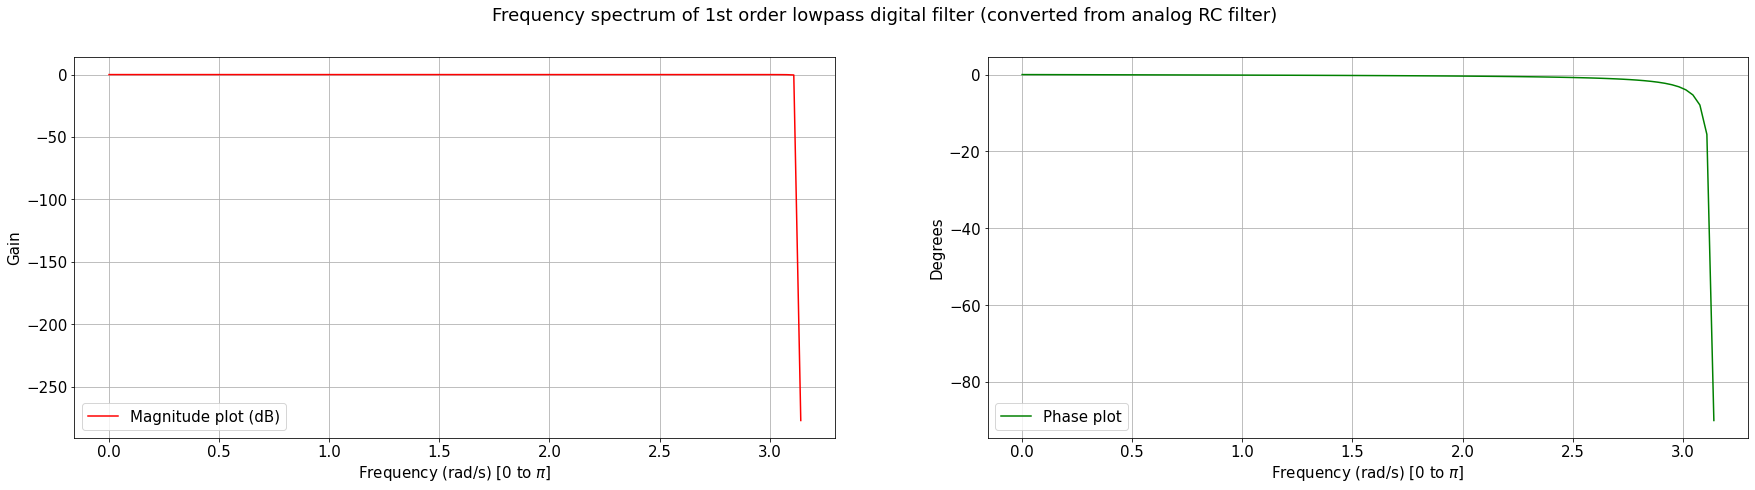

In [100]:
import matplotlib.pyplot as plt
import cmath

R=47000
C=47e-9

w=np.linspace(0,np.pi,100)
z=np.array([exp(complex(0,i)) for i in w ], dtype=complex)

tf= (z+1)/( z*(2*R*C+1) + 1 - 2*R*C )

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(w,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (rad/s) [0 to $\pi$]')
ax[0].legend()
ax[0].grid()
ax[1].plot(w,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (rad/s) [0 to $\pi$]')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 1st order lowpass digital filter (converted from analog RC filter)')
plt.show()

**Analog to Digital conversion of 1st order high pass filter**

In [90]:
from sympy import *
s,r,c=symbols('s R C')
expr=s*r*c/(1 + s*r*c)
print(' The transfer function is: ')
expr

 The transfer function is: 


C*R*s/(C*R*s + 1)

In [92]:
z=symbols('z')
expr=expr.subs(s,  2*((z-1)/(z+1)) )
print('Substituting s ')
expr

Substituting s 


2*C*R*(z - 1)/((z + 1)*(2*C*R*(z - 1)/(z + 1) + 1))

In [93]:
expr=sympy.simplify(expr)
expr

2*C*R*(z - 1)/(2*C*R*(z - 1) + z + 1)

In [94]:
expr=sympy.expand(expr)
expr

2*C*R*z/(2*C*R*z - 2*C*R + z + 1) - 2*C*R/(2*C*R*z - 2*C*R + z + 1)

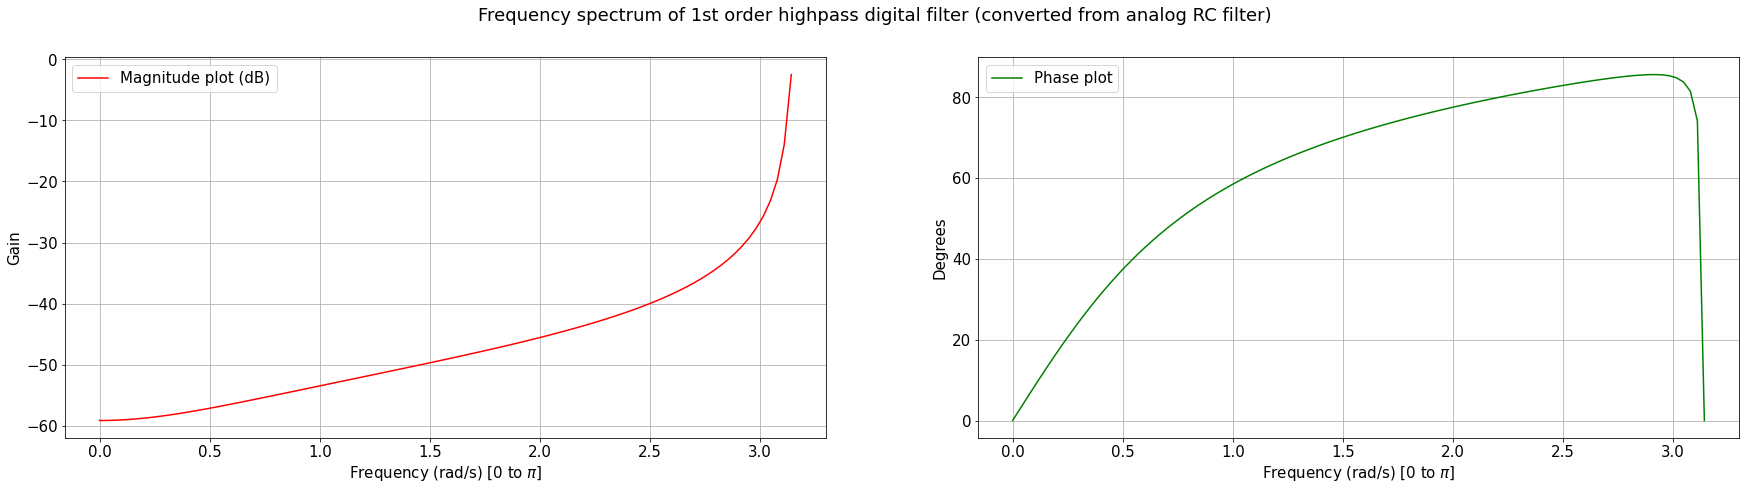

In [95]:
import matplotlib.pyplot as plt
import cmath

R=47000
C=47e-9

w=np.linspace(0,np.pi,100)
z=np.array([exp(complex(0,i)) for i in w ], dtype=complex)

tf= (R*C*(2*z - 1))/( z*(2*R*C+1) + 1 - 2*R*C )

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(w,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (rad/s) [0 to $\pi$]')
ax[0].legend()
ax[0].grid()
ax[1].plot(w,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (rad/s) [0 to $\pi$]')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 1st order highpass digital filter (converted from analog RC filter)')
plt.show()

**Analog to Digital conversion of 2nd order low pass filter**

In [128]:
from sympy import *
s,r,c=symbols('s R C')
expr=1/(1 + s**2*r**2*c**2 + 3*s*r*c)
print(' The transfer function is: ')
expr

 The transfer function is: 


1/(C**2*R**2*s**2 + 3*C*R*s + 1)

In [129]:
z=symbols('z')
expr=expr.subs(s,  2*((z-1)/(z+1)) )
print('Substituting s ')
expr

Substituting s 


1/(4*C**2*R**2*(z - 1)**2/(z + 1)**2 + 6*C*R*(z - 1)/(z + 1) + 1)

In [130]:
expr=sympy.simplify(expr)
expr

(z + 1)**2/(4*C**2*R**2*(z - 1)**2 + 6*C*R*(z - 1)*(z + 1) + (z + 1)**2)

In [131]:
expr=sympy.expand(expr)
expr

z**2/(4*C**2*R**2*z**2 - 8*C**2*R**2*z + 4*C**2*R**2 + 6*C*R*z**2 - 6*C*R + z**2 + 2*z + 1) + 2*z/(4*C**2*R**2*z**2 - 8*C**2*R**2*z + 4*C**2*R**2 + 6*C*R*z**2 - 6*C*R + z**2 + 2*z + 1) + 1/(4*C**2*R**2*z**2 - 8*C**2*R**2*z + 4*C**2*R**2 + 6*C*R*z**2 - 6*C*R + z**2 + 2*z + 1)

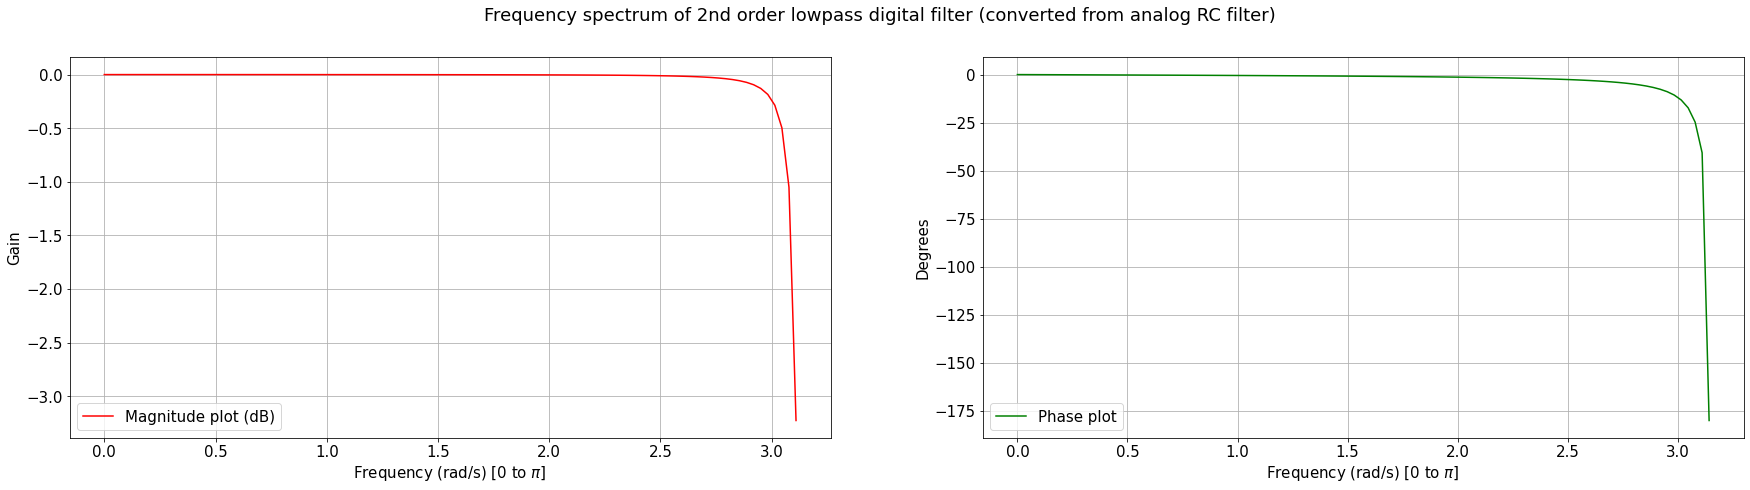

In [132]:
import matplotlib.pyplot as plt
import cmath
import warnings
warnings.filterwarnings('ignore')

R=50000
C=50e-9

w=np.linspace(0,np.pi,100)
z=np.array([exp(complex(0,i)) for i in w ], dtype=complex)

tf= (z**2 + 2*z + 1)/( (R**2*C**2)*(-4*z**2 +8*z -4) + R*C*(6*z**2 - 6) + z**2 + 2*z +1 )

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(w,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (rad/s) [0 to $\pi$]')
ax[0].legend()
ax[0].grid()
ax[1].plot(w,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (rad/s) [0 to $\pi$]')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 2nd order lowpass digital filter (converted from analog RC filter)')
plt.show()

**Analog to Digital conversion of 2nd order band pass filter**

In [113]:
from sympy import *
s,r,c1, c2=symbols('s R C_1 C_2')
expr=s*r*c1/(1 + s**2*r**2*c1*c2 + 3*r*(c1+2*c2))
print(' The transfer function is: ')
expr

 The transfer function is: 


C_1*R*s/(C_1*C_2*R**2*s**2 + 3*R*(C_1 + 2*C_2) + 1)

In [114]:
z=symbols('z')
expr=expr.subs(s,  2*((z-1)/(z+1)) )
print('Substituting s ')
expr

Substituting s 


2*C_1*R*(z - 1)/((z + 1)*(4*C_1*C_2*R**2*(z - 1)**2/(z + 1)**2 + 3*R*(C_1 + 2*C_2) + 1))

In [115]:
expr=sympy.simplify(expr)
expr

2*C_1*R*(z - 1)*(z + 1)/(4*C_1*C_2*R**2*(z - 1)**2 + (z + 1)**2*(3*R*(C_1 + 2*C_2) + 1))

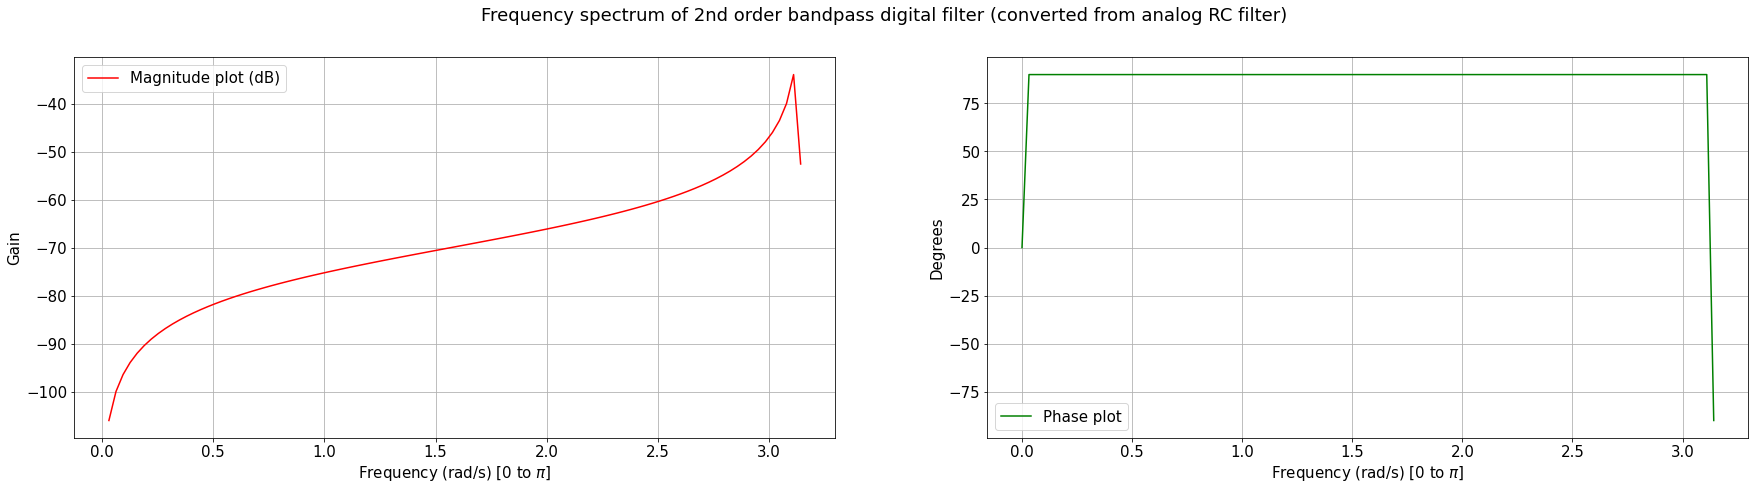

In [134]:
import matplotlib.pyplot as plt
import cmath
import warnings
warnings.filterwarnings('ignore')

R=r=20000
fh=30000
fl=1000

C1=c1=1/(2*np.pi*fl*R)
C2=c2=1/(2*np.pi*fh*R)


w=np.linspace(0,np.pi,100)
z=np.array([exp(complex(0,i)) for i in w ],dtype=complex)

tf = (2*c1*r*(z-1)*(z+1))/( (4*c1*c2*(z-1)**2) + ((z+1)**2 *(3*r*(c1+2*c2)+1)) )

plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(1,2,figsize=(30,7))
ph = np.array([cmath.phase(i) for i in tf])
ax[0].plot(w,20*np.log10(abs(tf)),c='r',label='Magnitude plot (dB)')
ax[0].set_ylabel('Gain')
ax[0].set_xlabel('Frequency (rad/s) [0 to $\pi$]')
ax[0].legend()
ax[0].grid()
ax[1].plot(w,ph*(180/np.pi),c='g',label='Phase plot')
ax[1].set_ylabel('Degrees')
ax[1].set_xlabel('Frequency (rad/s) [0 to $\pi$]')
ax[1].legend()
ax[1].grid()
fig.suptitle('Frequency spectrum of 2nd order bandpass digital filter (converted from analog RC filter)')
plt.show()